# Задача 1

**Байесовский A/B тест с использованием нескольких метрик**

В A/B тесте учитываются две метрики: конверсия (кликов на 1000 показов) и средний чек (выручка на одного покупателя). Группа A имеет 300 кликов и средний чек 50 рублей, а группа B — 330 кликов и средний чек 55 рублей. Необходимо оценить, какая группа более успешна по обеим метрикам.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm

# Фактические данные
conversions_A, trials_A = 300, 1000
avg_check_A, std_check_A = 50, 10  # Средний чек и его стандартное отклонение
conversions_B, trials_B = 330, 1000
avg_check_B, std_check_B = 55, 10

# Априорное распределение для конверсии (равномерное распределение ~ beta(1, 1))
alpha_prior, beta_prior = 1, 1

# Априорное распределение для среднего чека (нормальное распределение)
mean_prior, std_prior = 50, 15

# Расчет апостериорного распределения для конверсии
posterior_A_conversion = beta(alpha_prior + conversions_A, beta_prior + trials_A - conversions_A)
posterior_B_conversion = beta(alpha_prior + conversions_B, beta_prior + trials_B - conversions_B)

# Расчет апостериорного распределения для среднего чека
posterior_A_check = norm(loc=avg_check_A, scale=std_check_A / np.sqrt(conversions_A))
posterior_B_check = norm(loc=avg_check_B, scale=std_check_B / np.sqrt(conversions_B))

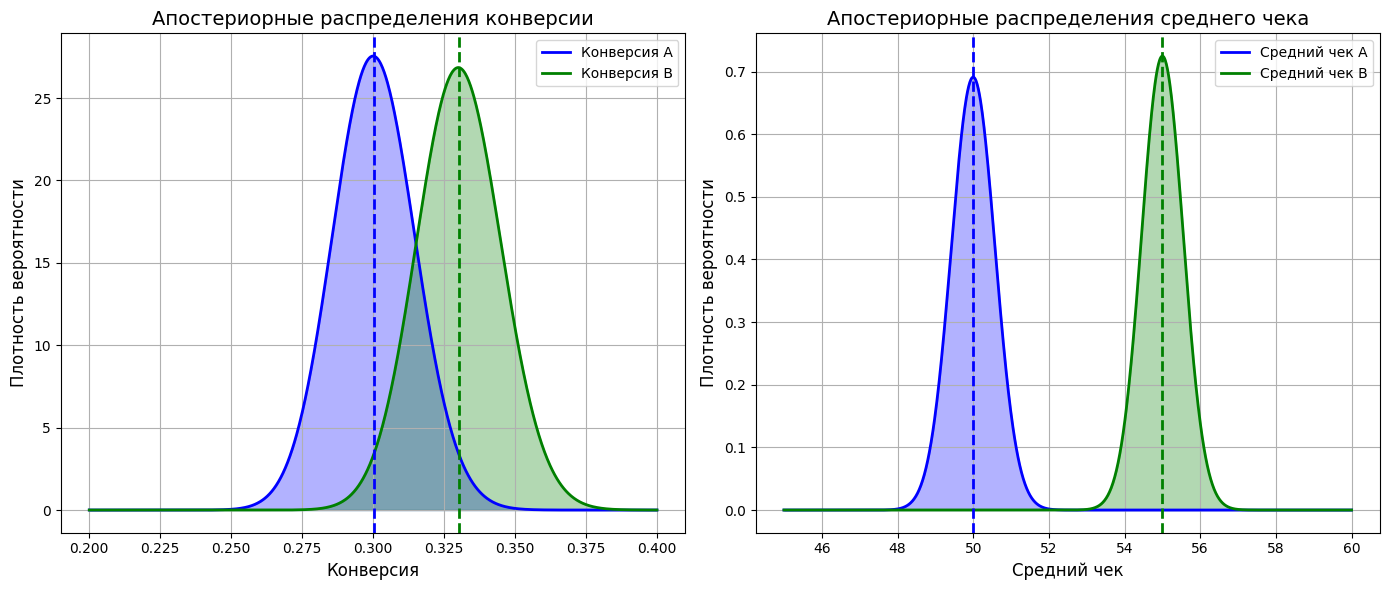

In [ ]:
# Создание фигуры и осей
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Визуализация конверсии с заливкой
x_conv = np.linspace(0.2, 0.4, 1000)
ax1.plot(x_conv, posterior_A_conversion.pdf(x_conv), label='Конверсия A', color='blue', lw=2)
ax1.fill_between(x_conv, posterior_A_conversion.pdf(x_conv), color='blue', alpha=0.3)
ax1.plot(x_conv, posterior_B_conversion.pdf(x_conv), label='Конверсия B', color='green', lw=2)
ax1.fill_between(x_conv, posterior_B_conversion.pdf(x_conv), color='green', alpha=0.3)

# Добавим средние значения как вертикальные линии
ax1.axvline(posterior_A_conversion.mean(), color='blue', linestyle='--', lw=2)
ax1.axvline(posterior_B_conversion.mean(), color='green', linestyle='--', lw=2)

# Оформление графика
ax1.set_title('Апостериорные распределения конверсии', fontsize=14)
ax1.set_xlabel('Конверсия', fontsize=12)
ax1.set_ylabel('Плотность вероятности', fontsize=12)
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True)

# Визуализация среднего чека с заливкой
x_check = np.linspace(45, 60, 1000)
ax2.plot(x_check, posterior_A_check.pdf(x_check), label='Средний чек A', color='blue', lw=2)
ax2.fill_between(x_check, posterior_A_check.pdf(x_check), color='blue', alpha=0.3)
ax2.plot(x_check, posterior_B_check.pdf(x_check), label='Средний чек B', color='green', lw=2)
ax2.fill_between(x_check, posterior_B_check.pdf(x_check), color='green', alpha=0.3)

# Добавим средние значения как вертикальные линии
ax2.axvline(posterior_A_check.mean(), color='blue', linestyle='--', lw=2)
ax2.axvline(posterior_B_check.mean(), color='green', linestyle='--', lw=2)

# Оформление графика
ax2.set_title('Апостериорные распределения среднего чека', fontsize=14)
ax2.set_xlabel('Средний чек', fontsize=12)
ax2.set_ylabel('Плотность вероятности', fontsize=12)
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(True)

# Показываем графики
plt.tight_layout()
plt.show()

In [ ]:
# Вычисление вероятности, что группа B лучше по обеим метрикам
prob_B_better_conversion = (posterior_B_conversion.rvs(10000) > posterior_A_conversion.rvs(10000)).mean()
prob_B_better_check = (posterior_B_check.rvs(10000) > posterior_A_check.rvs(10000)).mean()

print(f'Вероятность, что B лучше A по конверсии: {prob_B_better_conversion:.2f}')
print(f'Вероятность, что B лучше A по среднему чеку: {prob_B_better_check:.2f}')


Вероятность, что B лучше A по конверсии: 0.92
Вероятность, что B лучше A по среднему чеку: 1.00


# Задача 2

**Задача 2. Байесовский A/B тест с использованием MCMC**
Имеется информация о числе кликов и показов для двух вариантов страницы (A и B). Пусть вероятность клика на странице A и B моделируется с использованием бета-распределения с априорным распределением Beta(1, 1). Необходимо оценить апостериорные распределения вероятности клика для обоих вариантов, используя метод MCMC.

**Данные**:

`Вариант A`: 300 кликов из 1000 показов.

`Вариант B`: 330 кликов из 1000 показов.


**Необходимо**:

1.   Использовать MCMC для генерации выборок из апостериорного распределения.
2.   Построить графики апостериорных распределений для вероятности клика на странице A и B.
3.   Вычислить вероятность того, что вариант B лучше, чем вариант A.

Output()

Output()

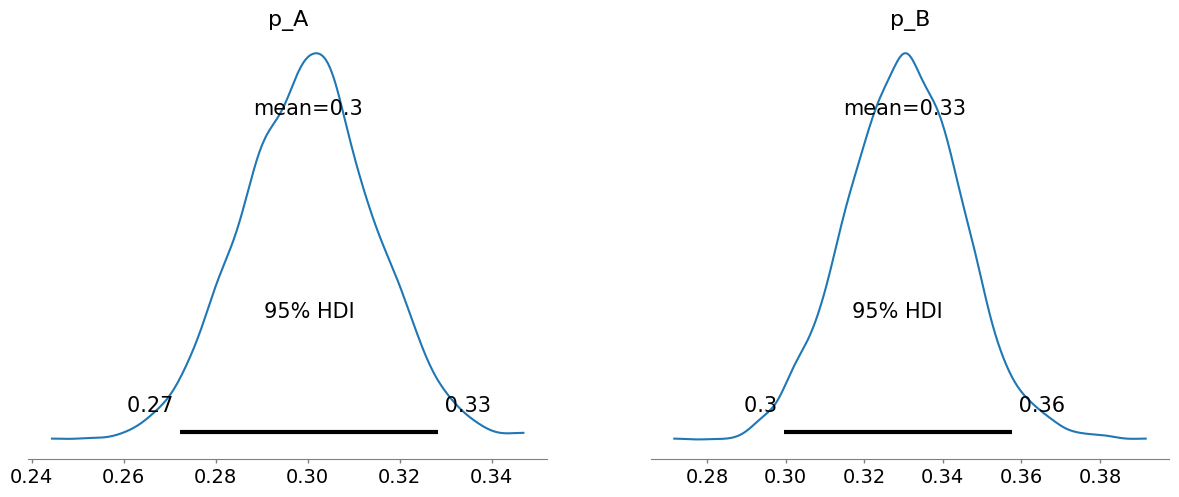

Вероятность того, что конверсия в B лучше A: 0.93


In [ ]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Данные
conversions_A, trials_A = 300, 1000
conversions_B, trials_B = 330, 1000

# Модель с использованием PyMC 4
with pm.Model() as model:
    # Априорное распределение для вероятностей клика на страницах A и B
    p_A = pm.Beta('p_A', alpha=1, beta=1)
    p_B = pm.Beta('p_B', alpha=1, beta=1)

    # Наблюдения (данные о кликах)
    obs_A = pm.Binomial('obs_A', n=trials_A, p=p_A, observed=conversions_A)
    obs_B = pm.Binomial('obs_B', n=trials_B, p=p_B, observed=conversions_B)

    # Метод MCMC для генерации выборок
    trace = pm.sample(2000, return_inferencedata=True)

# Визуализация апостериорных распределений с использованием Arviz
az.plot_posterior(trace, var_names=['p_A', 'p_B'], hdi_prob=0.95)
plt.show()

# Извлечение выборок для p_A и p_B
p_A_samples = trace.posterior['p_A'].values.flatten()
p_B_samples = trace.posterior['p_B'].values.flatten()

# Вычисление вероятности того, что B лучше, чем A
prob_B_better_A = (p_B_samples > p_A_samples).mean()

print(f'Вероятность того, что конверсия в B лучше A: {prob_B_better_A:.2f}')


# Задача 3

**Произвести оценку риска для теста из задания 2**

Оценка риска, если выбрали B, но A была лучше: 0.06 долларов
Оценка риска, если выбрали A, но B была лучше: 3.08 долларов


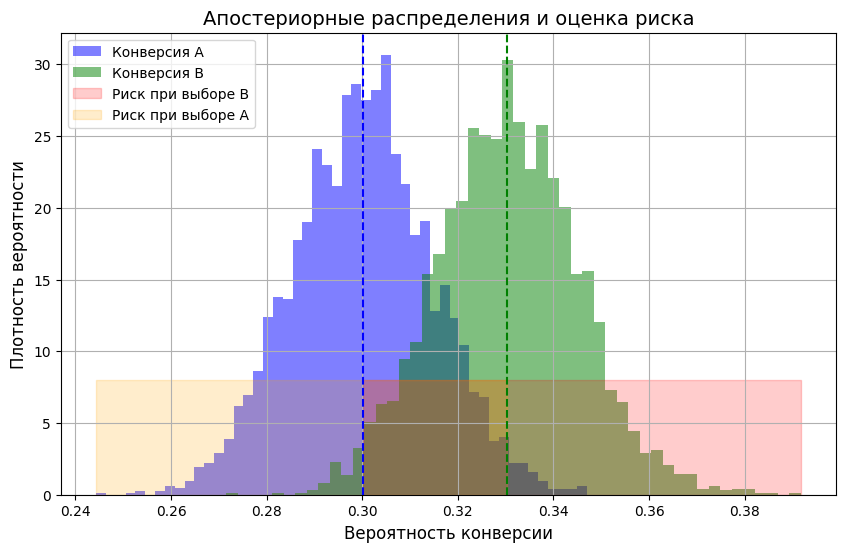

In [ ]:
profit_per_conversion = 100

# Оценка риска:
# Если выбрали B, но A была лучше, то упущенные выгоды - это разница в конверсии * прибыль на конверсию
risk_A_if_B = np.maximum(0, (p_A_samples - p_B_samples)) * profit_per_conversion

# Если выбрали A, но B была лучше, то упущенные выгоды аналогичны
risk_B_if_A = np.maximum(0, (p_B_samples - p_A_samples)) * profit_per_conversion

# Оценка среднего риска
mean_risk_A_if_B = np.mean(risk_A_if_B)
mean_risk_B_if_A = np.mean(risk_B_if_A)

print(f'Оценка риска, если выбрали B, но A была лучше: {mean_risk_A_if_B:.2f} долларов')
print(f'Оценка риска, если выбрали A, но B была лучше: {mean_risk_B_if_A:.2f} долларов')

# Визуализация апостериорных распределений с оценкой риска
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Построение апостериорных распределений
x = np.linspace(0, 1, 1000)
ax.hist(p_A_samples, bins=50, density=True, alpha=0.5, label='Конверсия A', color='blue')
ax.hist(p_B_samples, bins=50, density=True, alpha=0.5, label='Конверсия B', color='green')

ax.axvline(np.mean(p_A_samples), color='blue', linestyle='--')
ax.axvline(np.mean(p_B_samples), color='green', linestyle='--')

# Области риска
risk_threshold = np.mean(p_A_samples)  # Берем среднее значение группы A как порог
ax.fill_betweenx([0, 8], np.mean(p_A_samples), np.max(p_B_samples), color='red', alpha=0.2, label='Риск при выборе B')
ax.fill_betweenx([0, 8], np.min(p_A_samples), np.mean(p_B_samples), color='orange', alpha=0.2, label='Риск при выборе A')

# Настройки графика
ax.set_title('Апостериорные распределения и оценка риска', fontsize=14)
ax.set_xlabel('Вероятность конверсии', fontsize=12)
ax.set_ylabel('Плотность вероятности', fontsize=12)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True)

plt.show()

# Кейс
Сайт запустил A/B тест с целью увеличения дохода. В excel файле содержатся данные по результатам эксперимента c информацией об ID пользователея (user_id), типу выборки A или B (variant_name) и доходу, принесенному пользователем (revenue).
Необходимо проанализировать результаты эксперимента и написать свои рекомендации.

In [ ]:
import arviz
import matplotlib.pyplot as plt
import numpy
import pandas
import plotly.express as px
import plotly.graph_objects as go
import pymc
import scipy.stats as stats

In [ ]:
df = pandas.read_csv("AB_Test_Results.csv")
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [ ]:
df.groupby("USER_ID")["VARIANT_NAME"].nunique().value_counts()

,count
VARIANT_NAME,
1,4783
2,1541


In [ ]:
duplicate_users = df.groupby("USER_ID")["VARIANT_NAME"].nunique() == 2
duplicate_users = duplicate_users[duplicate_users].index
df = df[~df["USER_ID"].isin(duplicate_users)]

In [ ]:
df["USER_ID"].value_counts().value_counts()

,count
count,
1,3664
2,976
3,122
4,18
5,2
6,1


In [ ]:
px.box(df.loc[df["REVENUE"] > 0], x="REVENUE", color="VARIANT_NAME", labels=dict(VARIANT_NAME="Group"))

In [ ]:
df = df[df["REVENUE"] < 150]

In [ ]:
df.groupby("VARIANT_NAME").agg({
    "USER_ID": [
        ("Total", len),
        ("Unique", "nunique"),
    ],
    "REVENUE": [
        ("Purchases", lambda x: sum(x>0)),
        ("Purchase Fraction", lambda x: sum(x>0) / len(x)),
        ("Total Revenue", "sum"),
        ("Average Revenue", lambda x: numpy.mean(x[x>0])),
        ("STD Revenue", lambda x: numpy.std(x[x>0], ddof=1)),
        ("Shapiro-Wilk (p)", lambda x: stats.shapiro(x[x>0])[1]),
        ("D'Agostino-Pearson (p)", lambda x: stats.normaltest(x[x>0])[1]),
    ],
})

USER_ID          REVENUE                                  \
               Total Unique Purchases Purchase Fraction Total Revenue   
VARIANT_NAME                                                            
control         3025   2389        53          0.017521        274.55   
variant         3044   2393        43          0.014126        179.32   

                                                           \
             Average Revenue STD Revenue Shapiro-Wilk (p)   
VARIANT_NAME                                                
control             5.180189    5.942771     4.129932e-08   
variant             4.170233    4.932851     5.565176e-08   

                                     
             D'Agostino-Pearson (p)  
VARIANT_NAME                         
control                2.455830e-08  
variant                1.578531e-08

In [ ]:
control = df.query("VARIANT_NAME == 'control'")
variant = df.query("VARIANT_NAME == 'variant'")
stats.levene(
    control["REVENUE"][control["REVENUE"] > 0],
    variant["REVENUE"][variant["REVENUE"] > 0]
)

LeveneResult(statistic=0.7175741843558987, pvalue=0.3990923631774761)

In [ ]:
stats.mannwhitneyu(variant['REVENUE'], control['REVENUE'])


MannwhitneyuResult(statistic=4588312.0, pvalue=0.2859842308619548)

In [ ]:
stats.mannwhitneyu(variant.query("REVENUE > 0")['REVENUE'], control.query("REVENUE > 0")['REVENUE'])

MannwhitneyuResult(statistic=1030.0, pvalue=0.4218148352342157)

In [ ]:
def bootstrap(size:int=1000):
    kwargs = {"frac": 1, "replace": True}

    output = pandas.DataFrame(columns=["mean_per_visit", "mean_per_purchase", "group"])
    for i in range(size):
        v = variant["REVENUE"].sample(random_state=13*i+17, **kwargs)
        c = control["REVENUE"].sample(random_state=17*i+13, **kwargs)

        summary = {
            "mean_per_visit": [x.mean() for x in (v,c)],
            "mean_per_purchase": [x[x>0].mean() for x in (v,c)],
            "group": ["variant", "control"]
        }
        summary = pandas.DataFrame(summary)
        output = pandas.concat((output, summary), ignore_index=True)

    return output

output = bootstrap()

<ipython-input-16-582d6f847bc2>:15: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [ ]:
for c in output.columns[:-1]:
    fig = px.histogram(
        output,
        x=c,
        color="group",
        marginal="box",
        barmode="overlay",
        opacity=0.5
    ).update_layout(xaxis_title=f"Revenue ({c.replace('_', ' ').capitalize()})").show()


In [ ]:
variant_bootstrap = output.query("group == 'variant'").drop(columns="group").reset_index(drop=True)
control_bootstrap = output.query("group == 'control'").drop(columns="group").reset_index(drop=True)

diff = variant_bootstrap - control_bootstrap

confidence = 0.95
clb = diff.quantile(1 - confidence)
cub = diff.quantile(confidence)

for c in output.columns[:-1]:
    fig = px.histogram(diff, x=c, marginal="box")
    for x in [clb, cub]:
        fig.add_vline(x[c])
    fig.update_layout(xaxis_title="Variant - Control Revenue Offset ({})".format(c.replace("_", " ").capitalize()))
    fig.show()

In [ ]:
group_idx, group_name = pandas.factorize(df["VARIANT_NAME"])

with pymc.Model(coords={"groups": group_name}) as model:

    p = pymc.TruncatedNormal(
        "p",
        mu=(df["REVENUE"] > 0).sum() / len(df),
        sigma=0.1,
        lower=0,
        upper=1,
        dims="groups"
    )

    mu = pymc.TruncatedNormal(
        "mu",
        mu=df.query("REVENUE > 0")["REVENUE"].mean(),
        sigma=10,
        lower=0,
        dims="groups"
    )

    sigma = pymc.TruncatedNormal("sigma",
        mu=df.query("REVENUE > 0")["REVENUE"].std(ddof=1),
        sigma=10,
        lower=0,
        dims="groups"
    )

    pymc.Bernoulli(
        "p_obs",
        p=p[group_idx],
        observed=(df["REVENUE"] > 0).astype('float')
    )


    mask = df["REVENUE"] > 0
    y = pymc.Normal("y_obs", mu=mu[group_idx[mask]], sigma=sigma[group_idx[mask]], observed=df.loc[mask,"REVENUE"])


    mean_diff_visit = pymc.Deterministic("Variant - Control Revenue Offset (Mean per Visit)", mu[0]*p[0] - mu[1]*p[1])
    mean_diff_purchase = pymc.Deterministic("Variant - Control Revenue Offset (Mean per Purchase)", mu[0] - mu[1])


    trace = pymc.sample(1000, tune=1000)

Output()

Output()

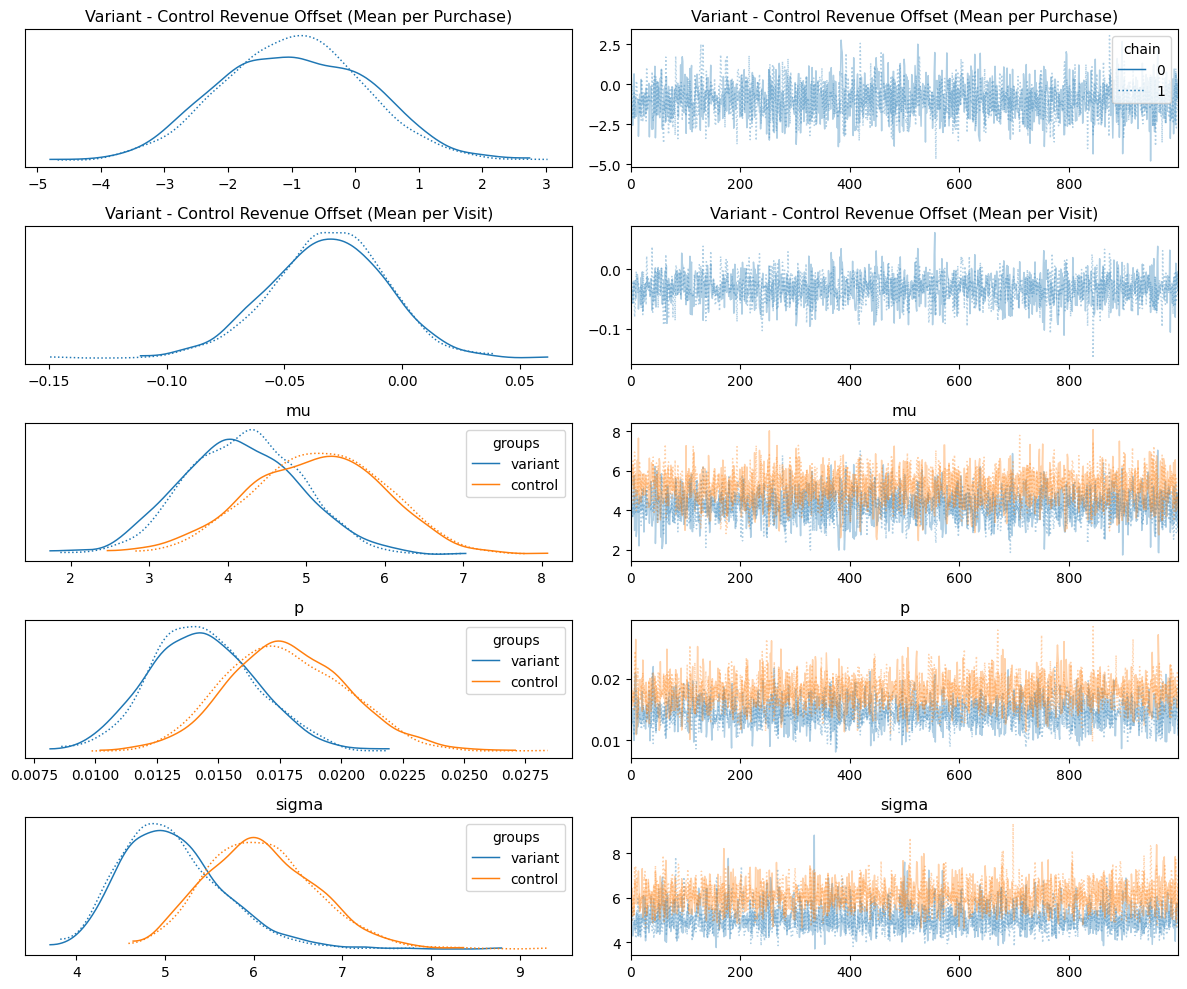

In [ ]:
arviz.plot_trace(trace, legend=True);
plt.tight_layout()

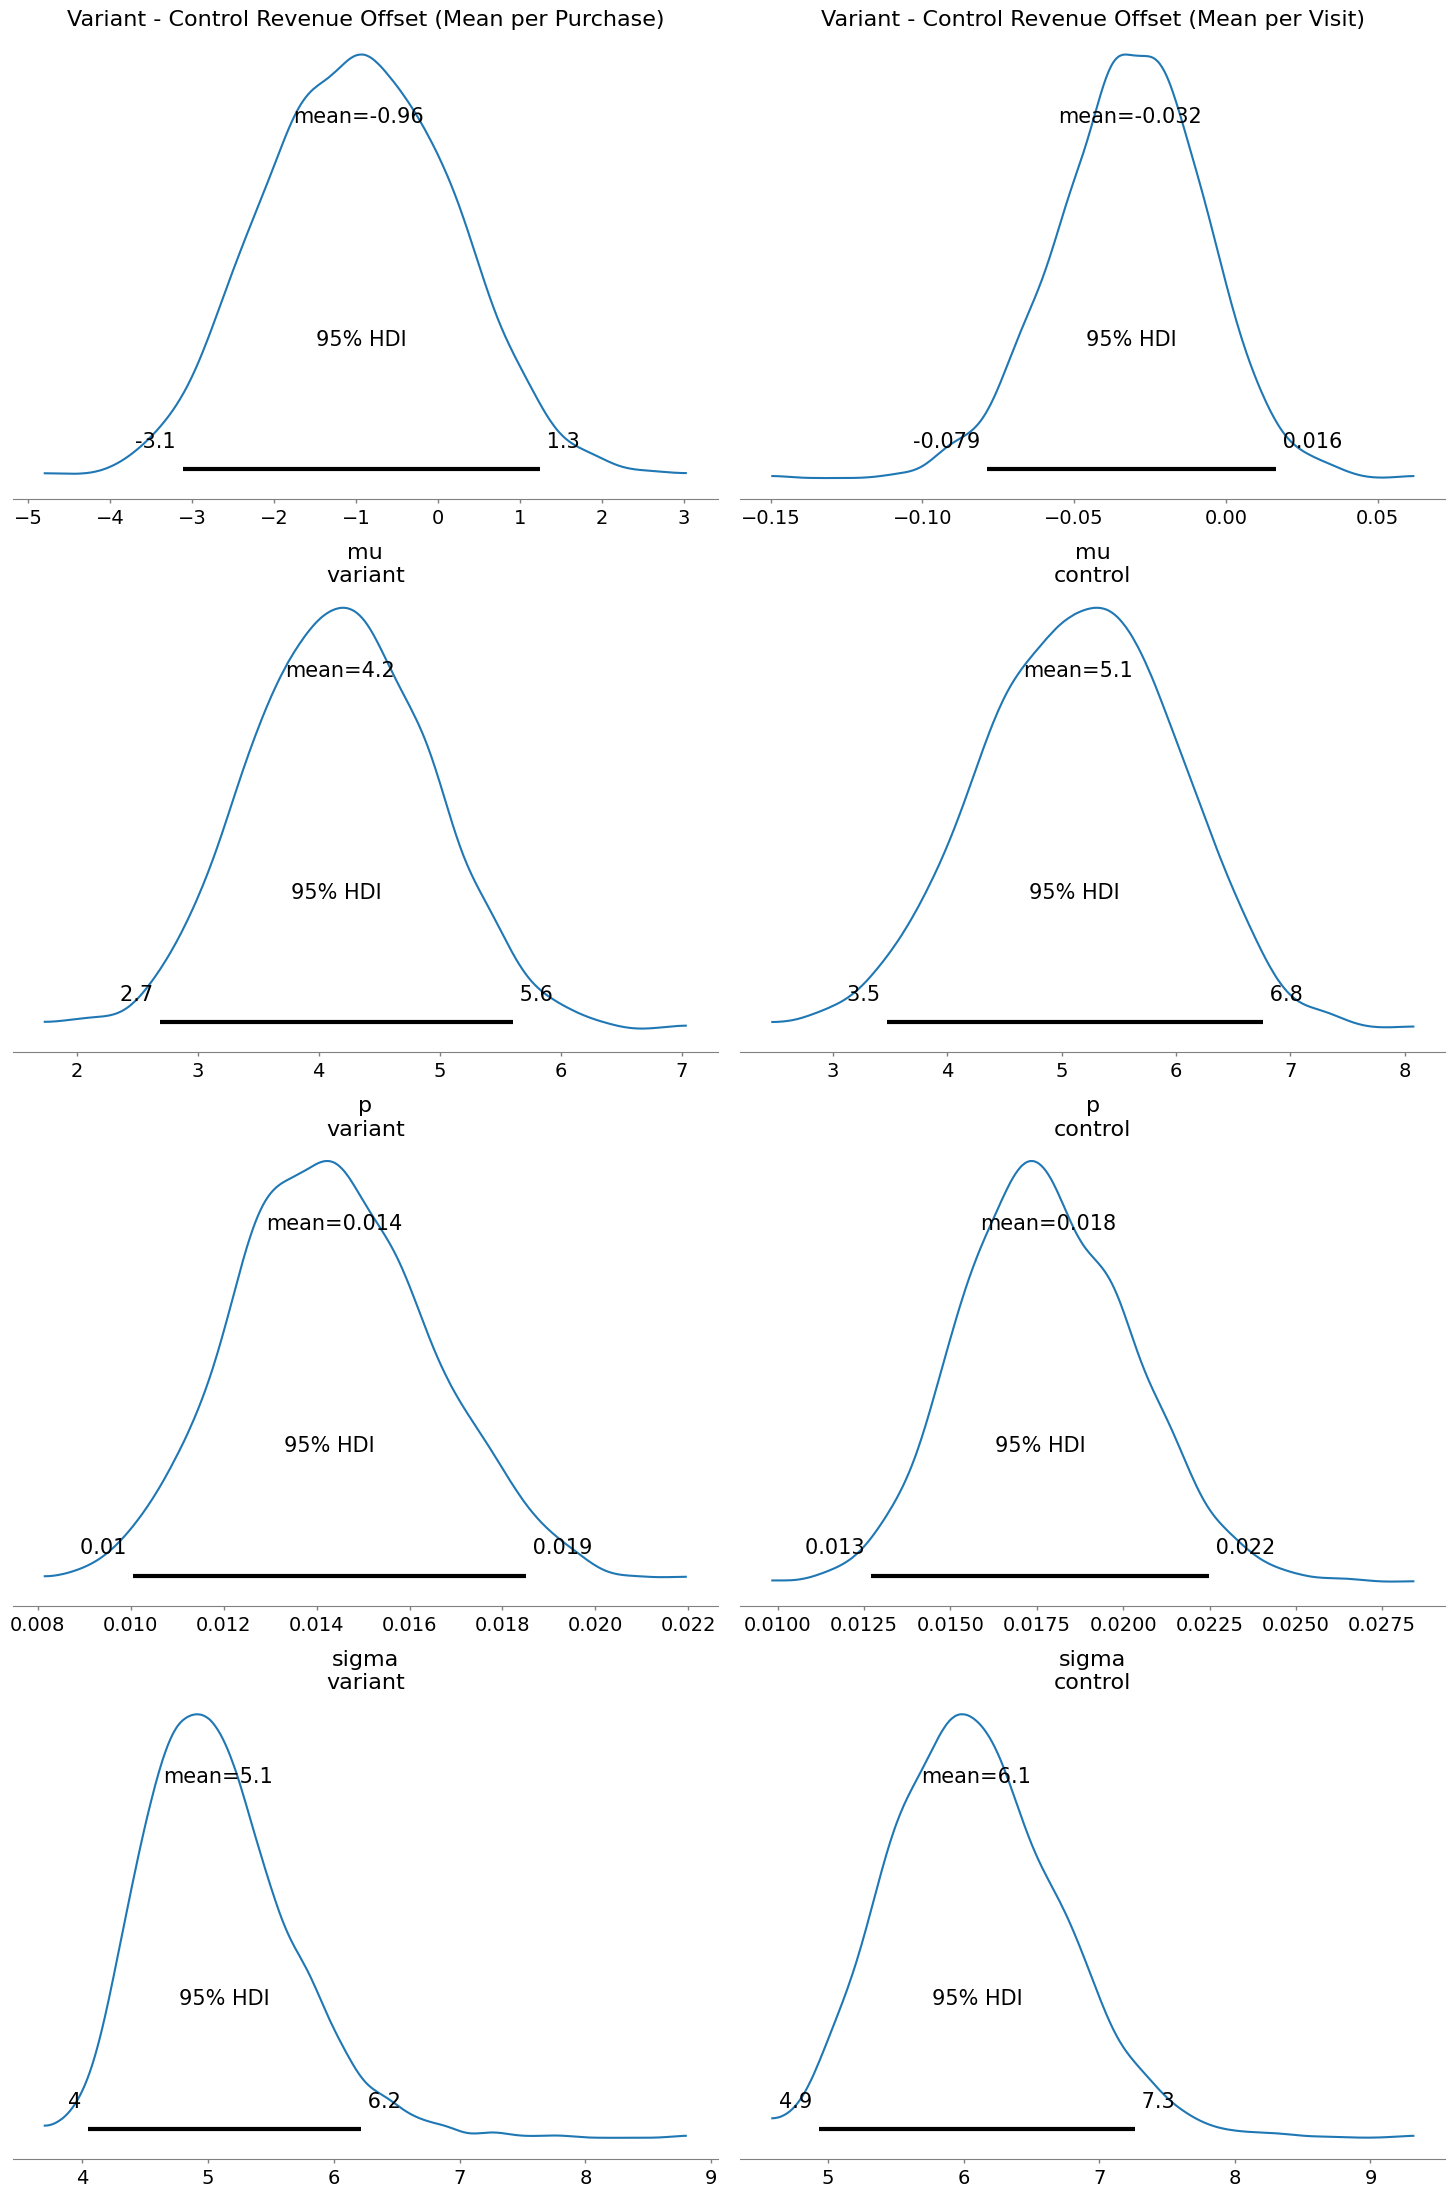

In [ ]:
arviz.plot_posterior(trace, grid=(4,2), hdi_prob=0.95);
plt.tight_layout()